# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


use 500 random data to do the Machine Learning

In [3]:
df_test=df.sample(500)
df_test

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
8184,9.244962,5.100905,4.144057,0.031184,0.033743,0.036203,0.038681,0.041294,0.044161,0.047399,...,0.998611,1.001593,1.004823,1.008280,1.011942,1.015789,1.019798,1.023947,1.028217,1.032583
5594,9.286503,5.156158,4.130344,0.031385,0.033994,0.036496,0.039012,0.041662,0.044570,0.047855,...,0.998850,1.002119,1.005624,1.009333,1.013213,1.017233,1.021359,1.025559,1.029801,1.034052
8254,9.598074,5.261353,4.336722,0.030608,0.033104,0.035499,0.037907,0.040440,0.043210,0.046332,...,1.000118,1.001585,1.003247,1.005126,1.007245,1.009626,1.012290,1.015259,1.018556,1.022202
8652,9.248273,4.645448,4.602825,0.030584,0.033057,0.035434,0.037827,0.040349,0.043112,0.046228,...,1.005949,1.005207,1.004511,1.003921,1.003495,1.003296,1.003381,1.003812,1.004647,1.005948
6076,9.901999,5.784915,4.117084,0.030568,0.033079,0.035486,0.037901,0.040438,0.043210,0.046332,...,0.991288,0.994220,0.997471,1.001043,1.004936,1.009152,1.013690,1.018552,1.023738,1.029250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8311,9.166753,4.591375,4.575378,0.030676,0.033113,0.035467,0.037846,0.040361,0.043121,0.046234,...,1.008641,1.008143,1.007644,1.007207,1.006889,1.006751,1.006853,1.007254,1.008014,1.009193
3687,10.226848,6.226848,4.000000,0.030755,0.033343,0.035810,0.038275,0.040855,0.043668,0.046833,...,0.991426,0.995280,0.999491,1.004045,1.008928,1.014126,1.019625,1.025411,1.031470,1.037787
8702,9.457277,5.078133,4.379144,0.030759,0.033267,0.035676,0.038099,0.040651,0.043445,0.046596,...,1.002836,1.004128,1.005571,1.007174,1.008946,1.010898,1.013038,1.015376,1.017923,1.020687
7298,9.345251,4.984247,4.361004,0.030861,0.033387,0.035811,0.038250,0.040819,0.043633,0.046807,...,1.001567,1.002928,1.004440,1.006112,1.007954,1.009974,1.012181,1.014585,1.017194,1.020017


single output*(predict Num Cu)

In [45]:
from sklearn.model_selection import train_test_split
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [46]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [47]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [48]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.metrics import r2_score

In [49]:
def DecisionTreeRegression(max_depth, X_train, X_test, y_train, y_test, plot_min, plot_max):
    clf = tree.DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = 5)
    clf = clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    MSE = ((y_pred-y_test)**2).mean()
    print("MSE = " , MSE)
    print('R-squared of training data is', clf.score(X_train, y_train))
    print('R-squared of testing data is' , clf.score(X_test, y_test))
    
    
    
    fig, axs = plt.subplots(1,1,figsize=(12,12))
    axs.scatter(clf.predict(X_test), y_test)
    axs.plot(np.linspace( plot_min, plot_max), np.linspace( plot_min, plot_max))
    axs.set_xlabel('Predicted_test')
    axs.set_ylabel('Actual_test')

    

MSE =  0.03837049592037715
R-squared of training data is 0.9721122624448467
R-squared of testing data is 0.8913197320709612


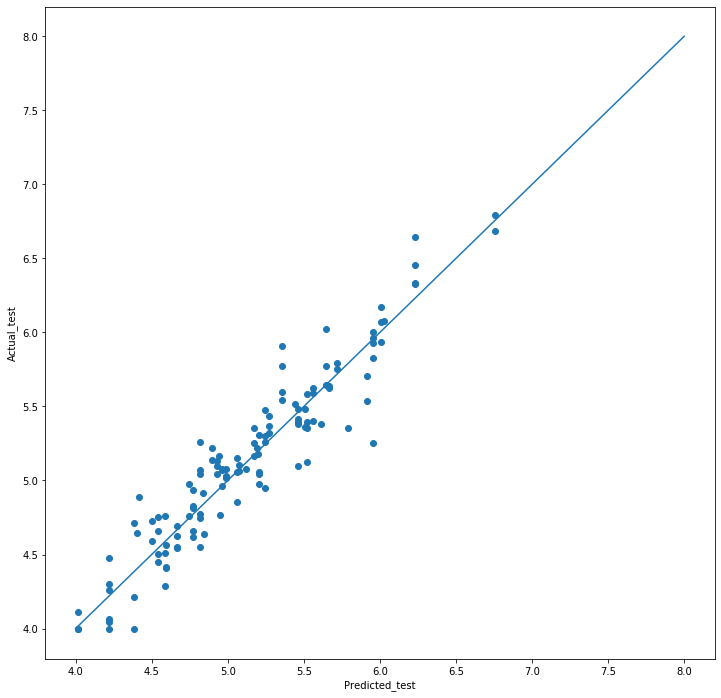

In [50]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# predict only Num of Te

In [51]:
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [52]:
min(df_test['Num Te'])

4.0

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


MSE =  0.0013855048634325662
R-squared of training data is 0.9930195406268857
R-squared of testing data is 0.9726884696068767


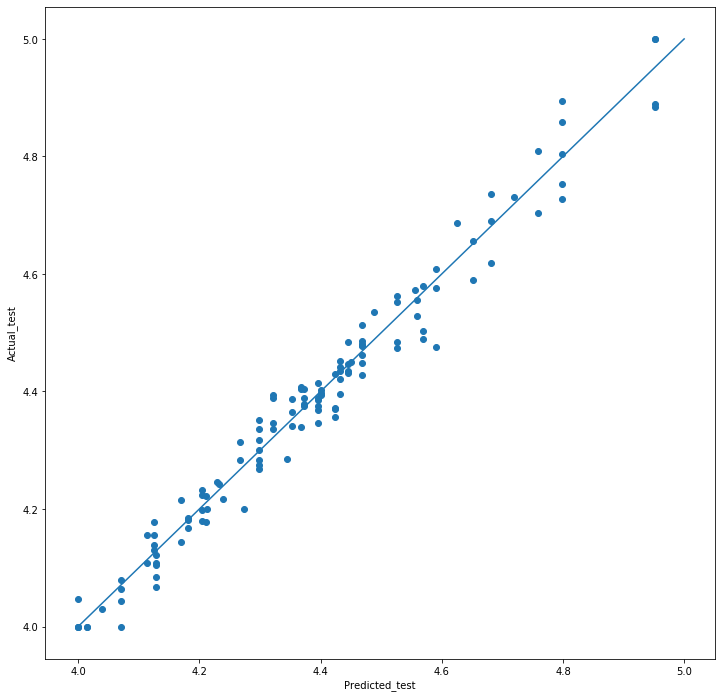

In [54]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

# use spectra predict Num of Cu, Te as multi target regression

In [55]:
# Multi target regression
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 100)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125, 2)


In [34]:
gpr = model.fit(train_features, train_labels)

MSE =  0.022980610722058814
R-squared of training data is 0.9650374153872986
R-squared of testing data is 0.8861749268605466


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

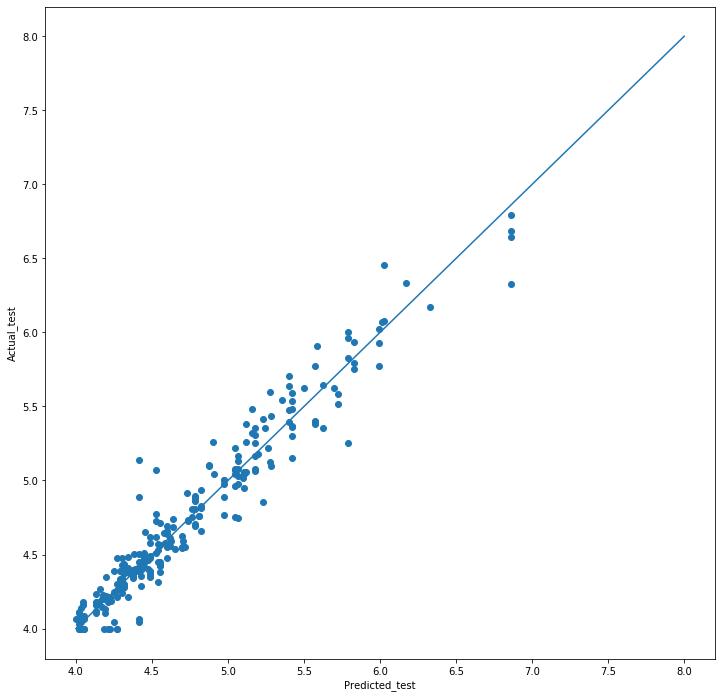

In [57]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

from the above, we can see that if we use multi target regression, the predicted values are still reasonable.
In the following, I am trying to use 1st and/or 2nd derivate to predict the number of atoms by multi target regression.

generate a derivate dataframe from the test dataframe.

In [58]:
import sys
sys.path.append('../PredictXANES')
import xanes_derivatives

In [59]:
dmu1, dmu2 = xanes_derivatives.xanes_derivatives(df_test)

In [60]:
# use first derivate only 
features=dmu1
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 99)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125, 2)


MSE =  0.04090774974396737
R-squared of training data is 0.9576083599370194
R-squared of testing data is 0.797380162655643


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

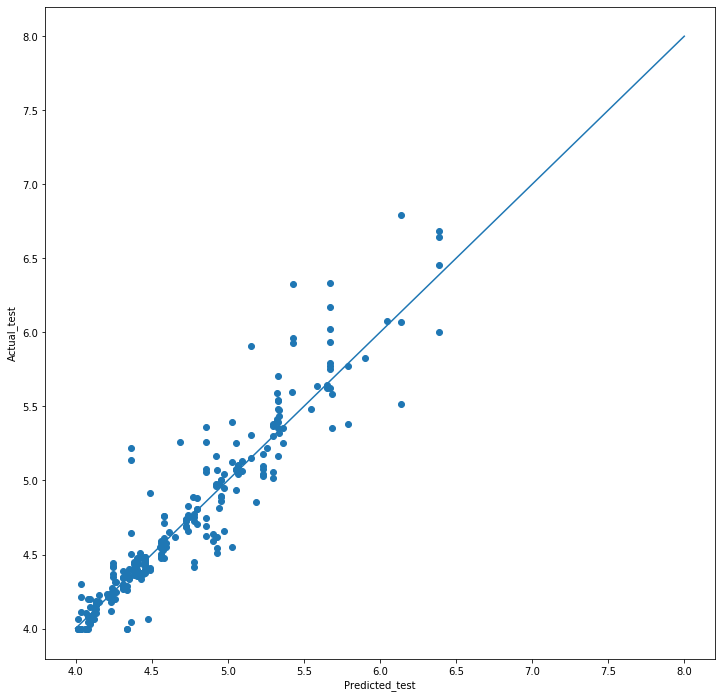

In [61]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [62]:
# use second derivate only 
features=dmu2
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 98)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125, 2)


MSE =  0.019823007530325266
R-squared of training data is 0.966068705814458
R-squared of testing data is 0.9018148251466023


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

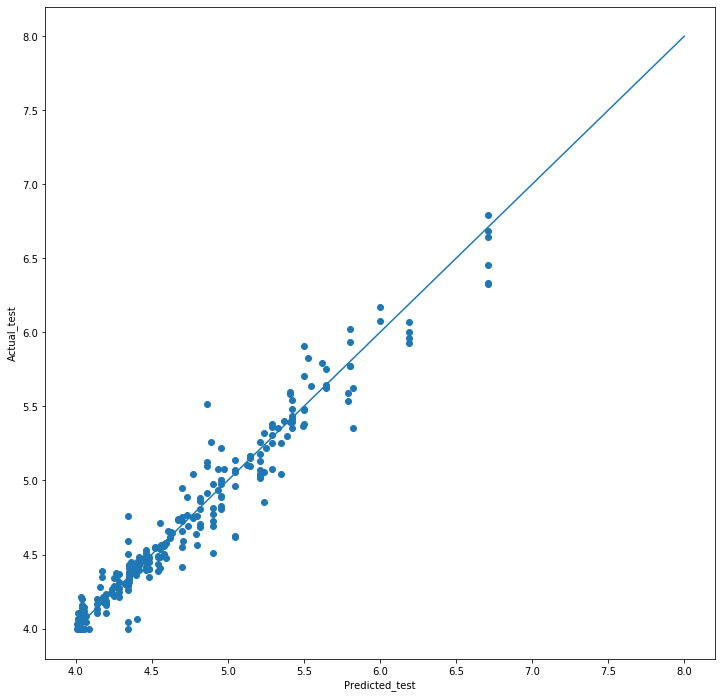

In [63]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and second derivate together, multi target regressor implementing GPR

In [64]:
dmu_both = np.concatenate((dmu1,dmu2),axis=1)
print('The shape of first derivate is:', dmu1.shape)
print('The shape of second derivate is:', dmu2.shape)
print('The shape of the concatenate derivate is:', dmu_both.shape)

The shape of first derivate is: (500, 99)
The shape of second derivate is: (500, 98)
The shape of the concatenate derivate is: (500, 197)


In [65]:
# use first and second derivate together
features=dmu_both
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 197)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 197)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 197)
Testing Labels Shape: (125, 2)


MSE =  0.023483278818837442
R-squared of training data is 0.9700945517814017
R-squared of testing data is 0.8836851656626086


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

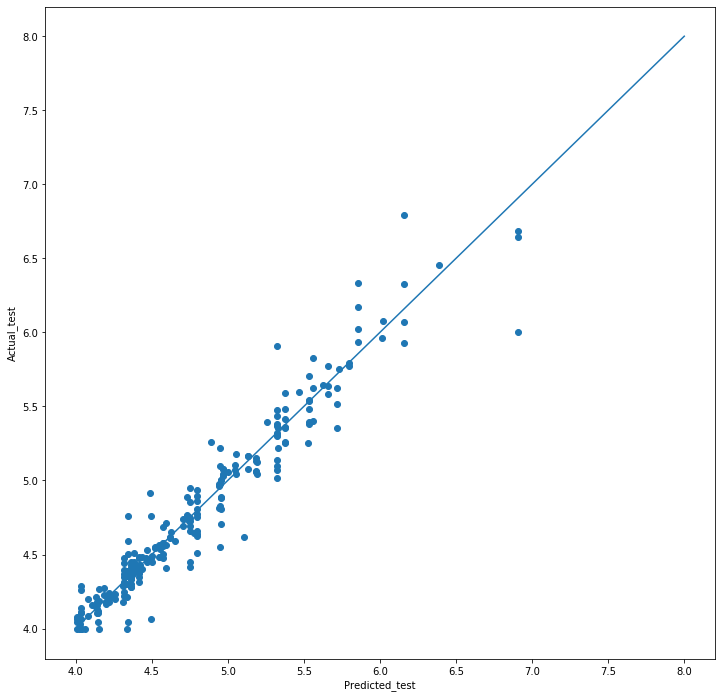

In [66]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and/or derivative to predict num of Cu, Te seperatly 

In [67]:
# use first derivate to predict Cu 
features=dmu1
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.0685285461243316
R-squared of training data is 0.9683959570594692
R-squared of testing data is 0.8059003258901156


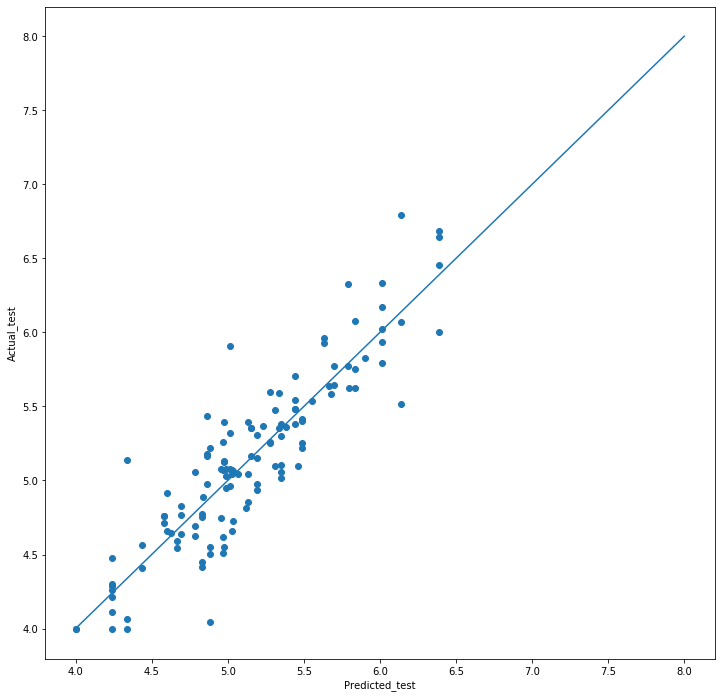

In [68]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [69]:
# use first derivate to predict Te
features=dmu1
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.0006080197065339103
R-squared of training data is 0.9967213048822775
R-squared of testing data is 0.9880145143240582


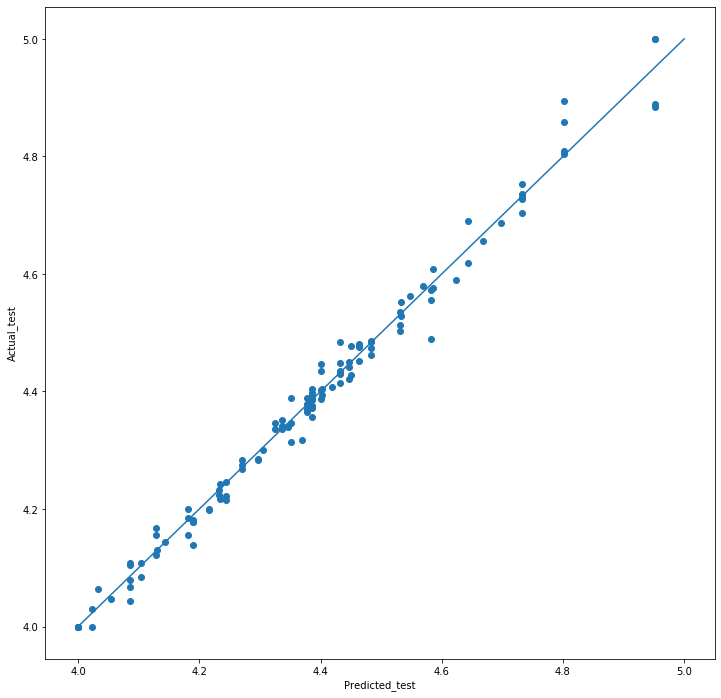

In [71]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

# This result is pretty good!

# The follwing is using second derivate to predict Cu,Te seperately

In [72]:
# use second derivate to predict Cu
features=dmu2
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', trin_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)


MSE =  0.037155639078122915
R-squared of training data is 0.9728719066105079
R-squared of testing data is 0.8947606823100613


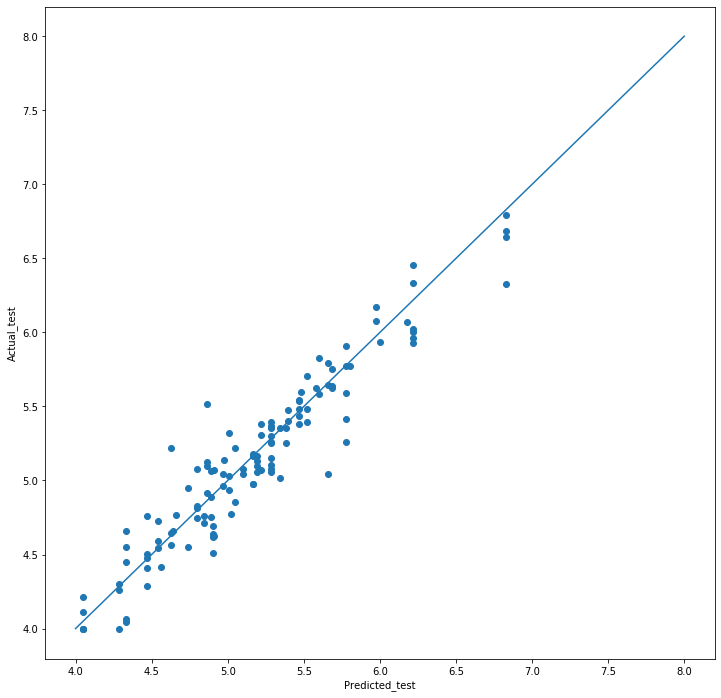

In [74]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [75]:
# use second derivate to predict Te
features=dmu2
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)


MSE =  0.0019060731447893646
R-squared of training data is 0.9939139244913365
R-squared of testing data is 0.9624268553655897


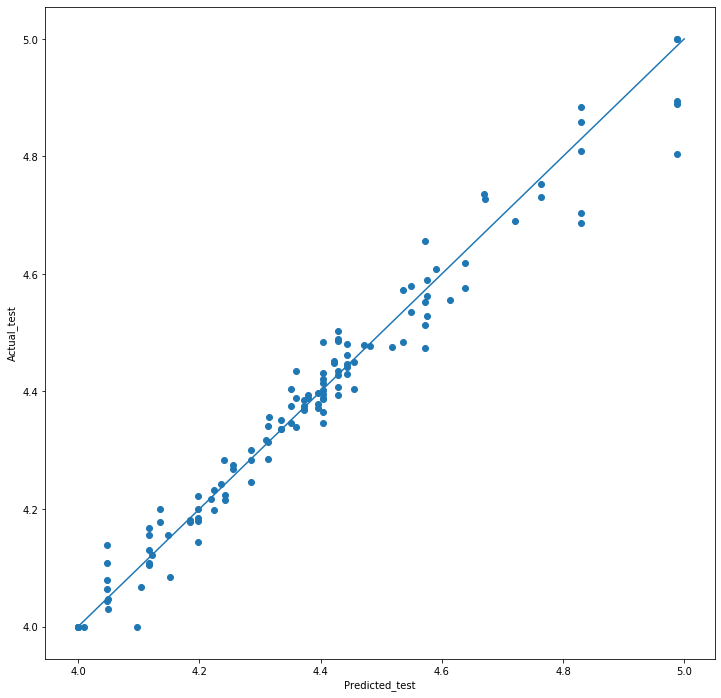

In [76]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

## Compared with spectra and first derivate, using second derivative data, both R2 for  Cu, Te are lower. Still the Cu has higher R2 compared with Te